# ENPH 213 - Week 3 Lab
In this lab, we will be working with Numerical Differentiation while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab3_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab3, where LastName is your last name.  Submit that file to onQ.

In [1]:
# import the libraries
import numpy as np
import math as m
import cmath as cm


from sympy import symbols, diff #for checking derivatives

In [2]:
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

## Part 1


Write a function RichDeriv(f,x,h) that inputs a function $f$ of a single independent variable $x$ and 
calculates the derivative of the function using Richardson’s extrapolation formula:

$\large {\frac{df}{dx} = \frac{1}{3} \left[ 4 \left(\frac{f(x+h) - f(x-h)}{2h} \right) - \frac{f(x+2h) - f(x-2h)}{4h} \right]}$
  
Ensure that your code can work with $x$ as a vector input so that the your deriv function will then return a vector containing the derivatives at each point. 

Assume that you do not know what exact function you will use, but you know it will be some variation of a $\sin$ function.  Create an anonymous lambda function as a place holder of the form:

$\large A \sin (k x + \phi)$

Using the lambda function, define your function $f(x)$ such that $f(x) = 5 \sin (2x)$.  

To investigate how the accuracy of the derivative is influenced by the step size, plot the difference 
between the true value of the derivative and the numerically calculated values over the range of x values from $x=0$ to 
$ x= 2\pi$ in steps of $\pi /100$.  

Starting with $h = \pi/10$, and then increasing the denominator by 10 for each iteration, determine the optimal value for $h$.  Once the step size becomes too small, the accuracy of the calculation will begin to increase due to roundoff errors.  $h$ will be optimal when the error is no longer decreasing.  For a characteristic value of "the error", sum up the absolute values of all differences between the numerical derivative and the exact derivative.

Similar to the plot above, plot the difference between the numerical derivative and the exact derivative for your optimal value of $h$.  Make 2 more similar plots: one for $h_{optimal}$/2 and one for $h_{optimal}$/4.

**Q:** With each decrease in the step $h$ by a factor of 1/10, how does the error decrease and is it what you expect?  Briefly support your answer. 

In [3]:
# Given Variables
N = 200 # Number of points to calc
xb = 2*np.pi
xa = 0
h = (np.pi)/100
xPoints = np.arange(xa, xb+h, h)

# lambda function
def func(A, k, phi):
    return lambda x: A*np.sin(k*x+phi)

sFunc = func(5, 2, 0) # calling func




$\large {\frac{df}{dx} = \frac{1}{3} \left[ 4 \left(\frac{f(x+h) - f(x-h)}{2h} \right) - \frac{f(x+2h) - f(x-2h)}{4h} \right]}$


In [4]:
# Rich derivative function using the given formula
def RichDeriv(x, h):
    derv = 1/3*(4*((sFunc(x+h)-sFunc(x-h))/(2*h))-((sFunc(x+2*h)-sFunc(x-2*h))/(4*h)))
    return derv


In [5]:
# function with the true derivative value
def trueVal(A, k, phi):
    return lambda x: A*k*np.cos(k*x+phi)

trueValF = trueVal(5, 2, 0) # calling the func

In [6]:
# calling the fucntions with the given values
DervPoints = RichDeriv(xPoints, h)
ActPoints = trueValF(xPoints) #Actual deriv values

# taking the diff
diff = (ActPoints - DervPoints)

Text(0.5, 1.0, 'Difference between True Value and Calulated Value')

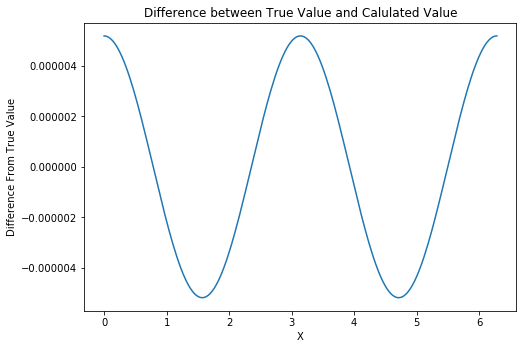

In [7]:
#plotting the difference vs X
fig = plt.figure() #figure object
ax = fig.add_axes([0,0,1,1])
ax.plot(xPoints, diff)
plt.xlabel("X") # adding x label
plt.ylabel("Difference From True Value") # y label
plt.title("Difference between True Value and Calulated Value") # title for plot

In [8]:
# determine the optimal value for  ℎ
# need to initalize the variables
i = 10  # set to 10 so no div by 0
last_error = 0
error = 0

# finding the optimal h value using a loop
# when the last error is greater or equal we have found optimal h
while(last_error >= error):
    
    h = np.pi/i #keep iterating through h using i div
    xPoints = np.arange(xa, xb+h, h) # set up x points between limits
    
    last_error = np.sum(abs(RichDeriv(xPoints,h)-trueValF(xPoints))) # calc error of points using functions
    
    i +=10 # iterating i by 10 each loop
    h = np.pi/i # setting h again for new error calc
    
    xPoints = np.arange(xa, xb+h, h) 
    # calc new error
    error = np.sum(abs(RichDeriv(xPoints,h)-trueValF(xPoints)))
    #print(i,error) #printing the terms to check

#print(i)
#calculate the optimal values
i_Opt = i-10 
h_Opt = np.pi/i_Opt
x_Opt = np.arange(xa,xb + h_Opt,h_Opt)

# calc x opt for divisions of optimal h
x_Opt1 = np.arange(xa,xb + h_Opt*0.5, h_Opt*0.5)
x_Opt2 = np.arange(xa,xb + h_Opt*0.25, h_Opt*0.25)

print("The optimal value for h is", h_Opt, "occurs term", i_Opt+10)

The optimal value for h is 0.0017167172970436028 occurs term 1840


In [9]:
# calc the difference in the aprroximate values and the actual derv
Diff = trueValF(x_Opt) - RichDeriv(x_Opt,h_Opt)
Diff1 = trueValF(x_Opt1) - RichDeriv(x_Opt1,h_Opt*0.5)
Diff2 = trueValF(x_Opt2) - RichDeriv(x_Opt2,h_Opt*0.25)

Text(0.5, 1.0, 'Using Optimal h/4 Value')

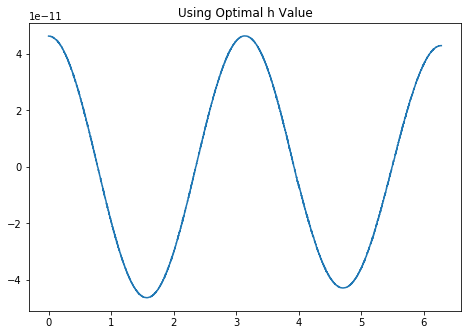

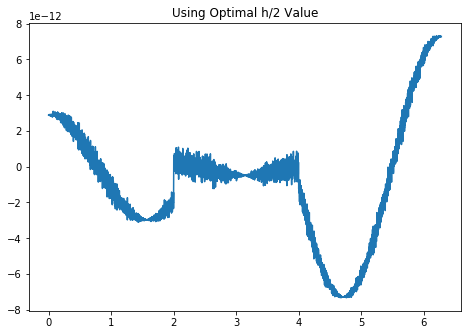

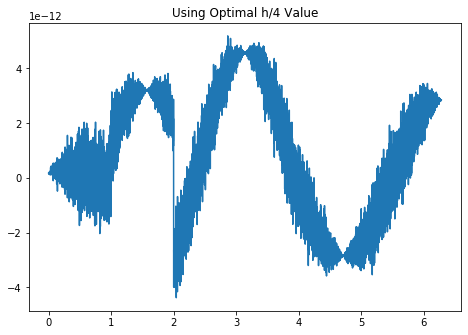

In [10]:
#plotting the optimal h val
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
ax.plot(x_Opt, Diff)
plt.title("Using Optimal h Value")

#plotting the h/2 val
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_Opt1, Diff1)
plt.title("Using Optimal h/2 Value")


#plotting the h/4 value
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_Opt2, Diff2)
plt.title("Using Optimal h/4 Value")


**Q:** With each decrease in the step $h$ by a factor of 1/10, how does the error decrease and is it what you expect?  Briefly support your answer. 

As the factor h is decreased by a factor of 1/10 the error decreases until the optimal h is reached. After the optimal h is reached, decreasing the factor only increases the uncertainty of the plot. We can see this phenominonn occur since the plot of h/2 has less thick lines than h/4 indicating more certainty of path.

Below i graph the plot of the optimal h/10 value to show that the uncertainty increases even more than the h/4 plot.

Text(0.5, 1.0, 'Example Using Optimal h/10 Value')

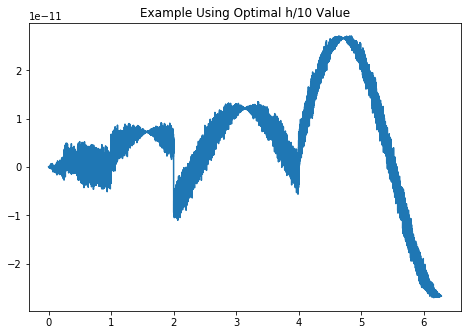

In [11]:
# adding new calc for h/10
x_Opt3 = np.arange(xa,xb + h_Opt*0.1, h_Opt*0.1)
Diff3 = trueValF(x_Opt3) - RichDeriv(x_Opt3,h_Opt*0.1)

#plotting the h/10
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_Opt3, Diff3)
plt.title("Example Using Optimal h/10 Value")


## Part 2

Load the data from "ENPH213_Lab3_Hysteresis-Data.csv".  This is similar to the data as was used in Lab 2.  Last lab, you calculated the area between the two curves, which corresponds to the strength of magnetization of a magnet.  The derivative of hysteresis curves can provide information on a magnet's coercivity, or the ability for a magnet to oppose an external magnetic field trying to change its magnetic field direction and demagnetize it.

Using the Forward Difference approximation, take the derivative of the two curves and plot the curves of $dv_y / dv_x$ as a function of $v_x$. Also, output the position ($v_x$) and value ($dv_y / dv_x$) for the two instances of maximum slope. [ Hint: use np.argmax() ]

In [12]:
# Load the data from the cvs file
# vx,vy,vx2,vy2 skip row 1
testData = np.loadtxt("ENPH213_Lab3_Hysteresis-Data.csv", delimiter = ",", skiprows = 1) 


In [13]:
#Forward difference for f(x) = x^2

#assign the columns to correct vars
vx = testData[:,0]
vy = testData[:,1]

vx2 = testData[:,2]
vy2 = testData[:,3]

N = len(vy) # Number of points 

# finding the max of arrays
vy_max = vy[np.argmax(vy)] # although not nessicary may be useful
vy_min = vy[np.argmin(vy)]

vx_max = vx[np.argmax(vx)]
vx_min = vx[np.argmin(vx)]

#function for derv calc using forward diff
def fprime(vx,vy):
   
    fprime = np.ones(N)
    
    for i in range(N-1):
        
        h = vx[i+1]-vx[i]
        fprime[i] = (vy[i+1]-vy[i])/h
    
    return fprime



In [14]:
# take the derv of the two curves
derv = fprime(vx,vy)
derv2 = fprime(vx2,vy2)

Text(0.5, 1.0, 'Derivatives of the Plots vs Vx2')

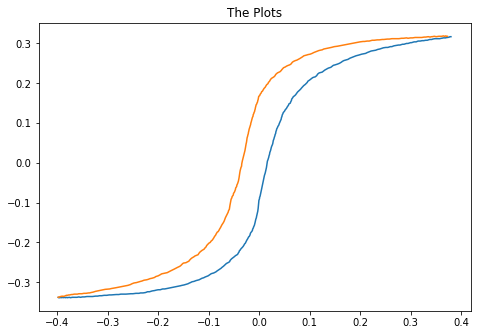

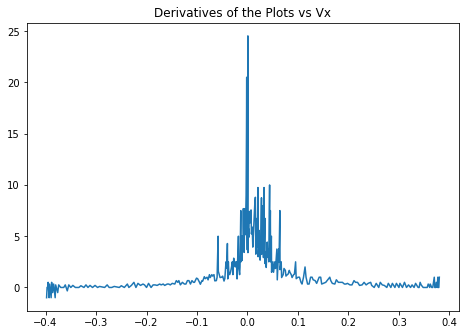

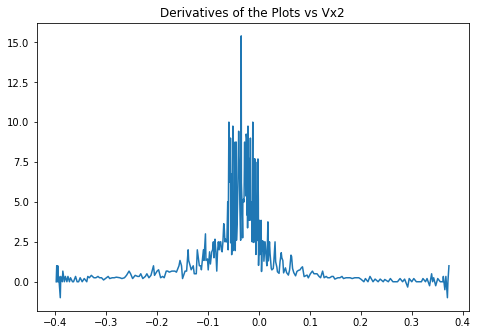

In [15]:
#plot the curves of  𝑑𝑣𝑦/𝑑𝑣𝑥  as a function of  𝑣𝑥

#plotting the points given
fig = plt.figure() #Create a figure object
ax = fig.add_axes([0,0,1,1]) #Adds axis, box at 0,0 with 100% length and width
ax.plot(vx,vy) #Plots the Data vy vs vx
ax.plot(vx2,vy2) #adding the new vx2 and vy2 values
plt.title("The Plots")

fig = plt.figure() #Create a figure object
ax = fig.add_axes([0,0,1,1]) #Adds axis, box at 0,0 with 100% length and width
ax.plot(vx,derv) #Plots the Data derv vs vx
#ax.plot(vx2,derv2) #adding the new derv2 and vx2values


plt.title("Derivatives of the Plots vs Vx")

fig = plt.figure() #Create a figure object
ax = fig.add_axes([0,0,1,1]) #Adds axis, box at 0,0 with 100% length and width
ax.plot(vx2,derv2) #adding the new derv2 and vx2values
plt.title("Derivatives of the Plots vs Vx2")


In [16]:
#Also, output the position ( 𝑣𝑥 ) and value ( 𝑑𝑣𝑦/𝑑𝑣𝑥 ) for the two instances of maximum slope. [ Hint: use np.argmax() ]

#finding the max derv index and value
Max_derv = derv[np.argmax(derv)]
Max_index = vx[np.argmax(derv)]

print("The Maximum slope for the first set is",Max_derv,"occurs at vx =",Max_index)

#finding the max derv index and value
Max_derv2 = derv2[np.argmax(derv2)]
Max_index2 = vx2[np.argmax(derv2)]

print("\nThe Maximum slope for the 2nd set is",Max_derv2,"occurs at vx2 =",Max_index2)


The Maximum slope for the first set is 24.5454545454545 occurs at vx = 0.000781

The Maximum slope for the 2nd set is 15.400000000000095 occurs at vx2 = -0.0348


## Part 3

Write a function pDeriv(f,x,h) that inputs a function $f$ of up to three independent variables $x = (x1, x2, x3)$ and $h$-values $h = (h1, h2, h3)$, where the arrays have either 1, 2, or 3 elements depending on the dimension of the problem.  $x = (x1, x2, x3)$ will represent a single point, and the output of pderiv(f,x,h) should returns a 1-D array of the same size for each of the corresponding partial derivatives at that point.  Try to reuse the Richardson’s extrapolation you developed above to calculate the derivatives.  The function should check to see how many input arguments are used and return either 1, 2 or 3 partial derivatives accordingly.  Test you pderiv(f,x,h) function on the following:

$\large{ f_1(x) = x^2 \\
f_2(x,y) = x^2 y \\
f_3(x,y,z) = xy + z^2}$

My results: 

x=10; hx=0.1; pDeriv = 19.99999

x=4, y=3; hx=0.2, hy=0.3; pDeriv = [24, 16]

x=1, y=2, z=3; hx=hy=hz=0.1; pDeriv = [2, 1, 6]

Hints:

To create a 1-D array: np.array([1, 2, 3])

To find the size of an array: np.size(arr)



In [17]:
#first Create the three test functions
def func1(x):
    return x**2

def func2(x,y):
    return x**2*y

def func3(x,y,z):
    return x*y+z**2

# now create the main function using the derivative calc from earlier
# use Rich derivative formula from Q1 but now with arrays 
def pDeriv(f, x, h):
    
    #check if array size 1
    if(np.size(x) == 1):
        
        xDeriv = 1/3*(4*((f(x+h)-f(x-h))/(2*h))-((f(x+2*h)-f(x-2*h))/(4*h)))
        return xDeriv
    
    #check if array size 2
    if(np.size(x) == 2):
        
        xDeriv = 1/3*(4*((f(x[0]+h[0],x[1])-f(x[0]-h[0],x[1]))/(2*h[0]))-((f(x[0]+2*h[0],x[1])-f(x[0]-2*h[0],x[1]))/(4*h[0])))
        
        yDeriv = 1/3*(4*((f(x[0],x[1]+h[1])-f(x[0],x[1]-h[1]))/(2*h[1]))-((f(x[0],2*h[1]+x[1])-f(x[0],-2*h[1]+x[1]))/(4*h[1])))
        return np.array([xDeriv,yDeriv])
    
    else: #array size 3
        xDeriv = 1/3*(4*((f(x[0]+h[0],x[1],x[2])-f(x[0]-h[0],x[1],x[2]))/(2*h[0]))-((f(x[0]+2*h[0],x[1],x[2])-f(x[0]-2*h[0],x[1],x[2]))/(4*h[0])))
        
        yDeriv = 1/3*(4*((f(x[0],x[1]+h[1],x[2])-f(x[0],x[1]-h[1],x[2]))/(2*h[1]))-((f(x[0],2*h[1]+x[1],x[2])-f(x[0],-2*h[1]+x[1],x[2]))/(4*h[1])))
        
        zDeriv = 1/3*(4*((f(x[0],x[1],h[2]+x[2])-f(x[0],x[1],-h[2]+x[2]))/(2*h[2]))-((f(x[0],x[1],x[2]+2*h[2])-f(x[0],x[1],-2*h[2]+x[2]))/(4*h[2])))
        return np.array([xDeriv,yDeriv,zDeriv])

    
# Now can use the test functions and points to test the derv func

Test1 = pDeriv(func1, 10, 0.1) #pDeriv = 19.99999
print('The First function x^2, x=10 and hx=0.1, pDeriv =',Test1)

Test2 = pDeriv(func2,[4,3],[0.2,0.3]) #pDeriv = [24, 16]
print('\nThe 2nd function yx^2, x=4, y=3; hx=0.2, hy=0.3; pDeriv =',Test2)

Test3 = pDeriv(func3, [1,2,3],[0.1,0.1,0.1]) #pDeriv = [2, 1, 6]
print('\nThe 3rd function yx+z^2, x=1, y=2, z=3; hx=hy=hz=0.1; pDeriv =',Test3)



The First function x^2, x=10 and hx=0.1, pDeriv = 19.99999999999993

The 2nd function yx^2, x=4, y=3; hx=0.2, hy=0.3; pDeriv = [24. 16.]

The 3rd function yx+z^2, x=1, y=2, z=3; hx=hy=hz=0.1; pDeriv = [2. 1. 6.]


## Part 4

Expand the pDeriv(f,x,h) function from Part 3 so that it can process a 2-D array of points, where $3 \leq x \leq 4$ with hx = 0.2 and $2 \leq y \leq 3$ with hy = 0.2. Write a function that can take the partial derivatives of $f_2$ at each of the 36 points in this range. Note that at each point, you should have two values associated with the partial derivative is each direction.  Check the results of individual points using your successful function from above.

A FOR loop would be accepted for this part, but you may also try to write a vectorized version that performs calculations directly on arrays. 

In [18]:
# setting up an array of zeros
Vectors = np.zeros([36,4])
#new h value
hnew = 0.2
#start i at 0
i = 0

def f(x):
    return x**2

# new function using similar stly to Q3 but with static h val
def NewFunc(f, x, h):
    
    xDeriv = 1/3*(4*((f(x[0]+h,x[1])-f(x[0]-h,x[1]))/(2*h))-((f(x[0]+2*h,x[1])-f(x[0]-2*h,x[1]))/(4*h)))
    
    yDeriv = 1/3*(4*((f(x[0],x[1]+h)-f(x[0],x[1]-h))/(2*h))-((f(x[0],2*h+x[1])-f(x[0],-2*h+x[1]))/(4*h)))
    return np.array([x[0], x[1], xDeriv, yDeriv])

# use nested for loops to iterate through the array and replace the value of Vectors
# 6 by 6 by 4 array so loops of 6, 6 and 4
for a in range(6):
    
    for j in range(6):
        points = np.array([3+hnew*a, 2+hnew*j])
        num = NewFunc(func2, points, hnew)
        
        for k in range(4):
            Vectors[i,k] = num[k]
            
        i +=1
            
print("Vectorized Array\n X\tY\tDX\tDY\n",Vectors) # printing the array

Vectorized Array
 X	Y	DX	DY
 [[ 3.    2.   12.    9.  ]
 [ 3.    2.2  13.2   9.  ]
 [ 3.    2.4  14.4   9.  ]
 [ 3.    2.6  15.6   9.  ]
 [ 3.    2.8  16.8   9.  ]
 [ 3.    3.   18.    9.  ]
 [ 3.2   2.   12.8  10.24]
 [ 3.2   2.2  14.08 10.24]
 [ 3.2   2.4  15.36 10.24]
 [ 3.2   2.6  16.64 10.24]
 [ 3.2   2.8  17.92 10.24]
 [ 3.2   3.   19.2  10.24]
 [ 3.4   2.   13.6  11.56]
 [ 3.4   2.2  14.96 11.56]
 [ 3.4   2.4  16.32 11.56]
 [ 3.4   2.6  17.68 11.56]
 [ 3.4   2.8  19.04 11.56]
 [ 3.4   3.   20.4  11.56]
 [ 3.6   2.   14.4  12.96]
 [ 3.6   2.2  15.84 12.96]
 [ 3.6   2.4  17.28 12.96]
 [ 3.6   2.6  18.72 12.96]
 [ 3.6   2.8  20.16 12.96]
 [ 3.6   3.   21.6  12.96]
 [ 3.8   2.   15.2  14.44]
 [ 3.8   2.2  16.72 14.44]
 [ 3.8   2.4  18.24 14.44]
 [ 3.8   2.6  19.76 14.44]
 [ 3.8   2.8  21.28 14.44]
 [ 3.8   3.   22.8  14.44]
 [ 4.    2.   16.   16.  ]
 [ 4.    2.2  17.6  16.  ]
 [ 4.    2.4  19.2  16.  ]
 [ 4.    2.6  20.8  16.  ]
 [ 4.    2.8  22.4  16.  ]
 [ 4.    3.   24.   16.  ]

## Part 5

For the function

$\large f(x, y) = \frac{1}{10^{x^2+Y^2}} \cos(\pi x - \pi/3)$

Plot the function on a surface plot for $ -1 \leq x, y \leq 1$ and each having a step size of 0.1.  This will help to visualize the shape of the function to compare the derivatives.

Then compute the partial derivatives in both directions for the function using a step size of 0.01.  This is, effectively, the gradient field of the function where

$\large \vec\nabla f = \frac{\partial f}{\partial x} \hat x + \frac{\partial f}{\partial y} \hat y $

You can plot the partial derivatives in a Quiver plot.  After setting up 2D axes similar to a normal graph, use the function:

q = ax.quiver(X, Y, Px, Py)

where X, and Y are 1-D arrays for the x and y spacing, and Px and Py are the 2-D arrays for the partial derivatives for each point on the grid in the x and y directions.


In [19]:
# given vlaues
N = 1001
xa = ya = -1
xb = yb = 1

h = 0.1 #step size

# new x and y points for limits and step of h
xRange = np.arange(xa, xb+h, h)
yRange = np.arange(ya, yb+h, h)

x, y = np.meshgrid(xRange, yRange) # use mesh grid to allow points to pass to func

# new function with given equation
def nf(x,y):
    f = 1/(10**(x**2+y**2))*np.cos(np.pi*x-np.pi/3)
    return f

funcData = nf(x, y) #call function with x, y points



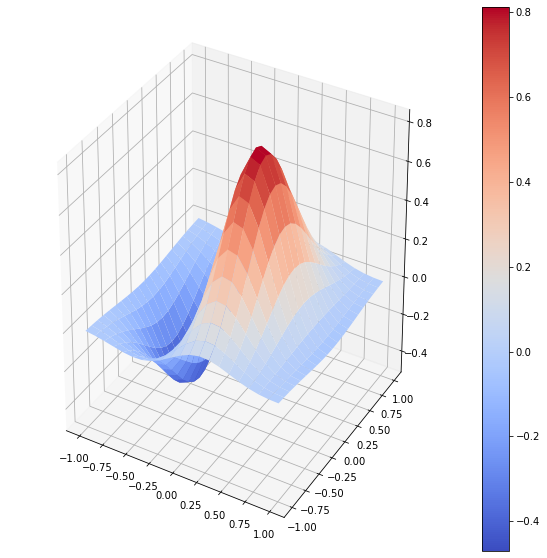

In [20]:
#plot of the given equation, not asked but helps confirm the grad of data

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x, y, funcData, cmap = cm.coolwarm)# adds color mapping

fig.colorbar(surf)

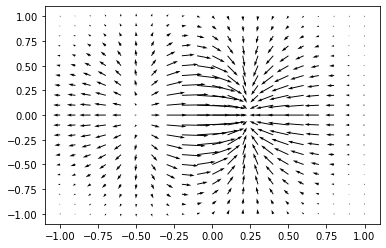

In [21]:
# usig the function gradient to return the derv of the data
# this method does not use the function I built earlier so is just to check

dervData = np.gradient(funcData,h, h) # partial derivative calc
#print(dervData) #test print

dervX = dervData[1] # partial derivative in x
dervY = dervData[0] # partial derivative in y

plt.quiver(x, y, dervX, dervY) # plot the grad 
plt.show()


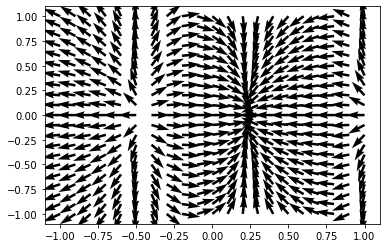

In [22]:
# Using the pDeriv function to calc the grad plot

# Need to use a nested for loop to iterate through the array
for a in range(21):
    for b in range(21):
        #p deriv takes f, x ,h use to calculate the derivatives
        deriv = pDeriv(nf, np.array([x[a,b], y[a,b]]), np.array([h, h]))
        # plot the grad using the array of data
        plt.quiver(x[a][b],y[a][b],deriv[0],deriv[1])
        
plt.show() # display the plot

In [23]:
# Notice the graphs match eachother so our function must be working and somwhat accurate

## Part 6

The electric potential V at location $\vec r = x \hat x + y \hat y + z \hat z$ due to a point charge $q$ at the origin is given by the expression: 

$\large V = \frac{q}{4 \pi \varepsilon_o} 1/r$,

where $r = |\vec r |$

Write a function $V$ that evaluates the voltage at (x,y,z). To keep the numbers simple, let $q = 4 \pi \varepsilon_o$.

The electric field can be calculated by evaluating the gradient of the electric potential:  

$\large \vec E = - \frac{\partial V}{\partial x} \hat x - \frac{\partial V}{\partial y} \hat y - \frac{\partial V}{\partial z} \hat z$


 
Write a function Egrad(V,x,y,z) that inputs your voltage function $V$ and the field coordinates $(x,y,z)$ and returns the $x$,$y$, and $z$ components of the electric field ($E_x$,$E_y$,$E_z$). Check your answer by 
writing a second function Coloumb(x,y,z) that evaluates the electric field directly using Coloumb’s law. 

$\large \vec E = \frac{q \hat r}{4 \pi \varepsilon_o} 1/r^2$


In [24]:
# given relations
E_0 = 8.85418782*10**-12 
q = 4*np.pi*E_0

x = y = z =1 # setting x,y,z to 1 to test functions

h = 0.0001 # step

# function to calc the voltage
def Volt(x,y,z):
    
    r_mag = np.sqrt(x**2 + y**2 + z**2) # magnitide of r
    
    V = q/(4*np.pi*E_0)*1/r_mag  # eqn for volts
    return V

# func using the partial derivatives to calculate the field
def Egrad(Volt, array):
    #p deriv takes f, x ,h use to calculate the derivatives
    deriv = pDeriv(Volt, np.array(array), np.array([h, h, h]))
    return -deriv 
   


In [25]:
# Check with Coloumbs Law
def coloumbs(x,y,z):
    r_mag = np.sqrt(x**2 + y**2 + z**2) # magnitude of r
    E = q/(4*np.pi*E_0)*1/r_mag**2 # eqn for E using coloumbs law
    return E

In [26]:

Test = Egrad(Volt,[x,y,z]) # assign a var to the function output

#mag_Egrad = np.linalg.norm(Test) #magnitude using the library func
mag_Egrad = np.sqrt(Test[0]**2+Test[1]**2+Test[2]**2) # magnitude using square root

Test1 = coloumbs(x,y,z) # check by calling coloumbs law with x,y,z

print("The Electric Field using Gradient:", Test,"With a Magnitude of:", mag_Egrad)
print("\nThe Electric Field using Coloumbs Law:", Test1)

The Electric Field using Gradient: [0.19245009 0.19245009 0.19245009] With a Magnitude of: 0.3333333333327366

The Electric Field using Coloumbs Law: 0.33333333333333337


## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

Although all the code was writen by myself I discussed the topics with Stuart Gaherty and Ekin Yelken.